# **SOM**

Machine Learning

**Name: Rosalinda Muñoz Gámez**

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

November 21th, 2024

#Abstract

This study compares the performance of three clustering algorithms: k-means, Expectation-Maximization (E-M), and Self-Organizing Maps (SOM) using the same dataset employed for k-means clustering. Each algorithm has distinct advantages and limitations in terms of clustering quality, computational complexity, and adaptability to high-dimensional data. The k-means algorithm is simple and efficient but can struggle with non-spherical data distributions. The E-M algorithm extends clustering capabilities with Gaussian Mixture Models, offering probabilistic assignments but at a higher computational cost. SOMs, inspired by neural networks, excel at visualizing high-dimensional data and preserving topological relationships.

# 1. Introduction
Clustering is a fundamental task in unsupervised learning, often used to uncover hidden patterns in data without predefined labels. It plays a critical role in various domains, including bioinformatics, customer segmentation, and image analysis. Three popular algorithms for clustering are k-means, Expectation-Maximization (E-M), and Self-Organizing Maps (SOM).

# 2. Content

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e341ecb4f5c18c56c106b808278676d8c2bc08d91948b40e12afa0b6e931a641
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


Clustering Algorithm Comparison:


,Dataset,K-Means Silhouette,GMM Silhouette,MiniSOM Silhouette
0,Blobs,0.733342,0.733342,0.193719
1,Anisotropic Blobs,0.509672,0.476929,0.237221
2,Unequal Variance,0.646799,0.619343,0.188486


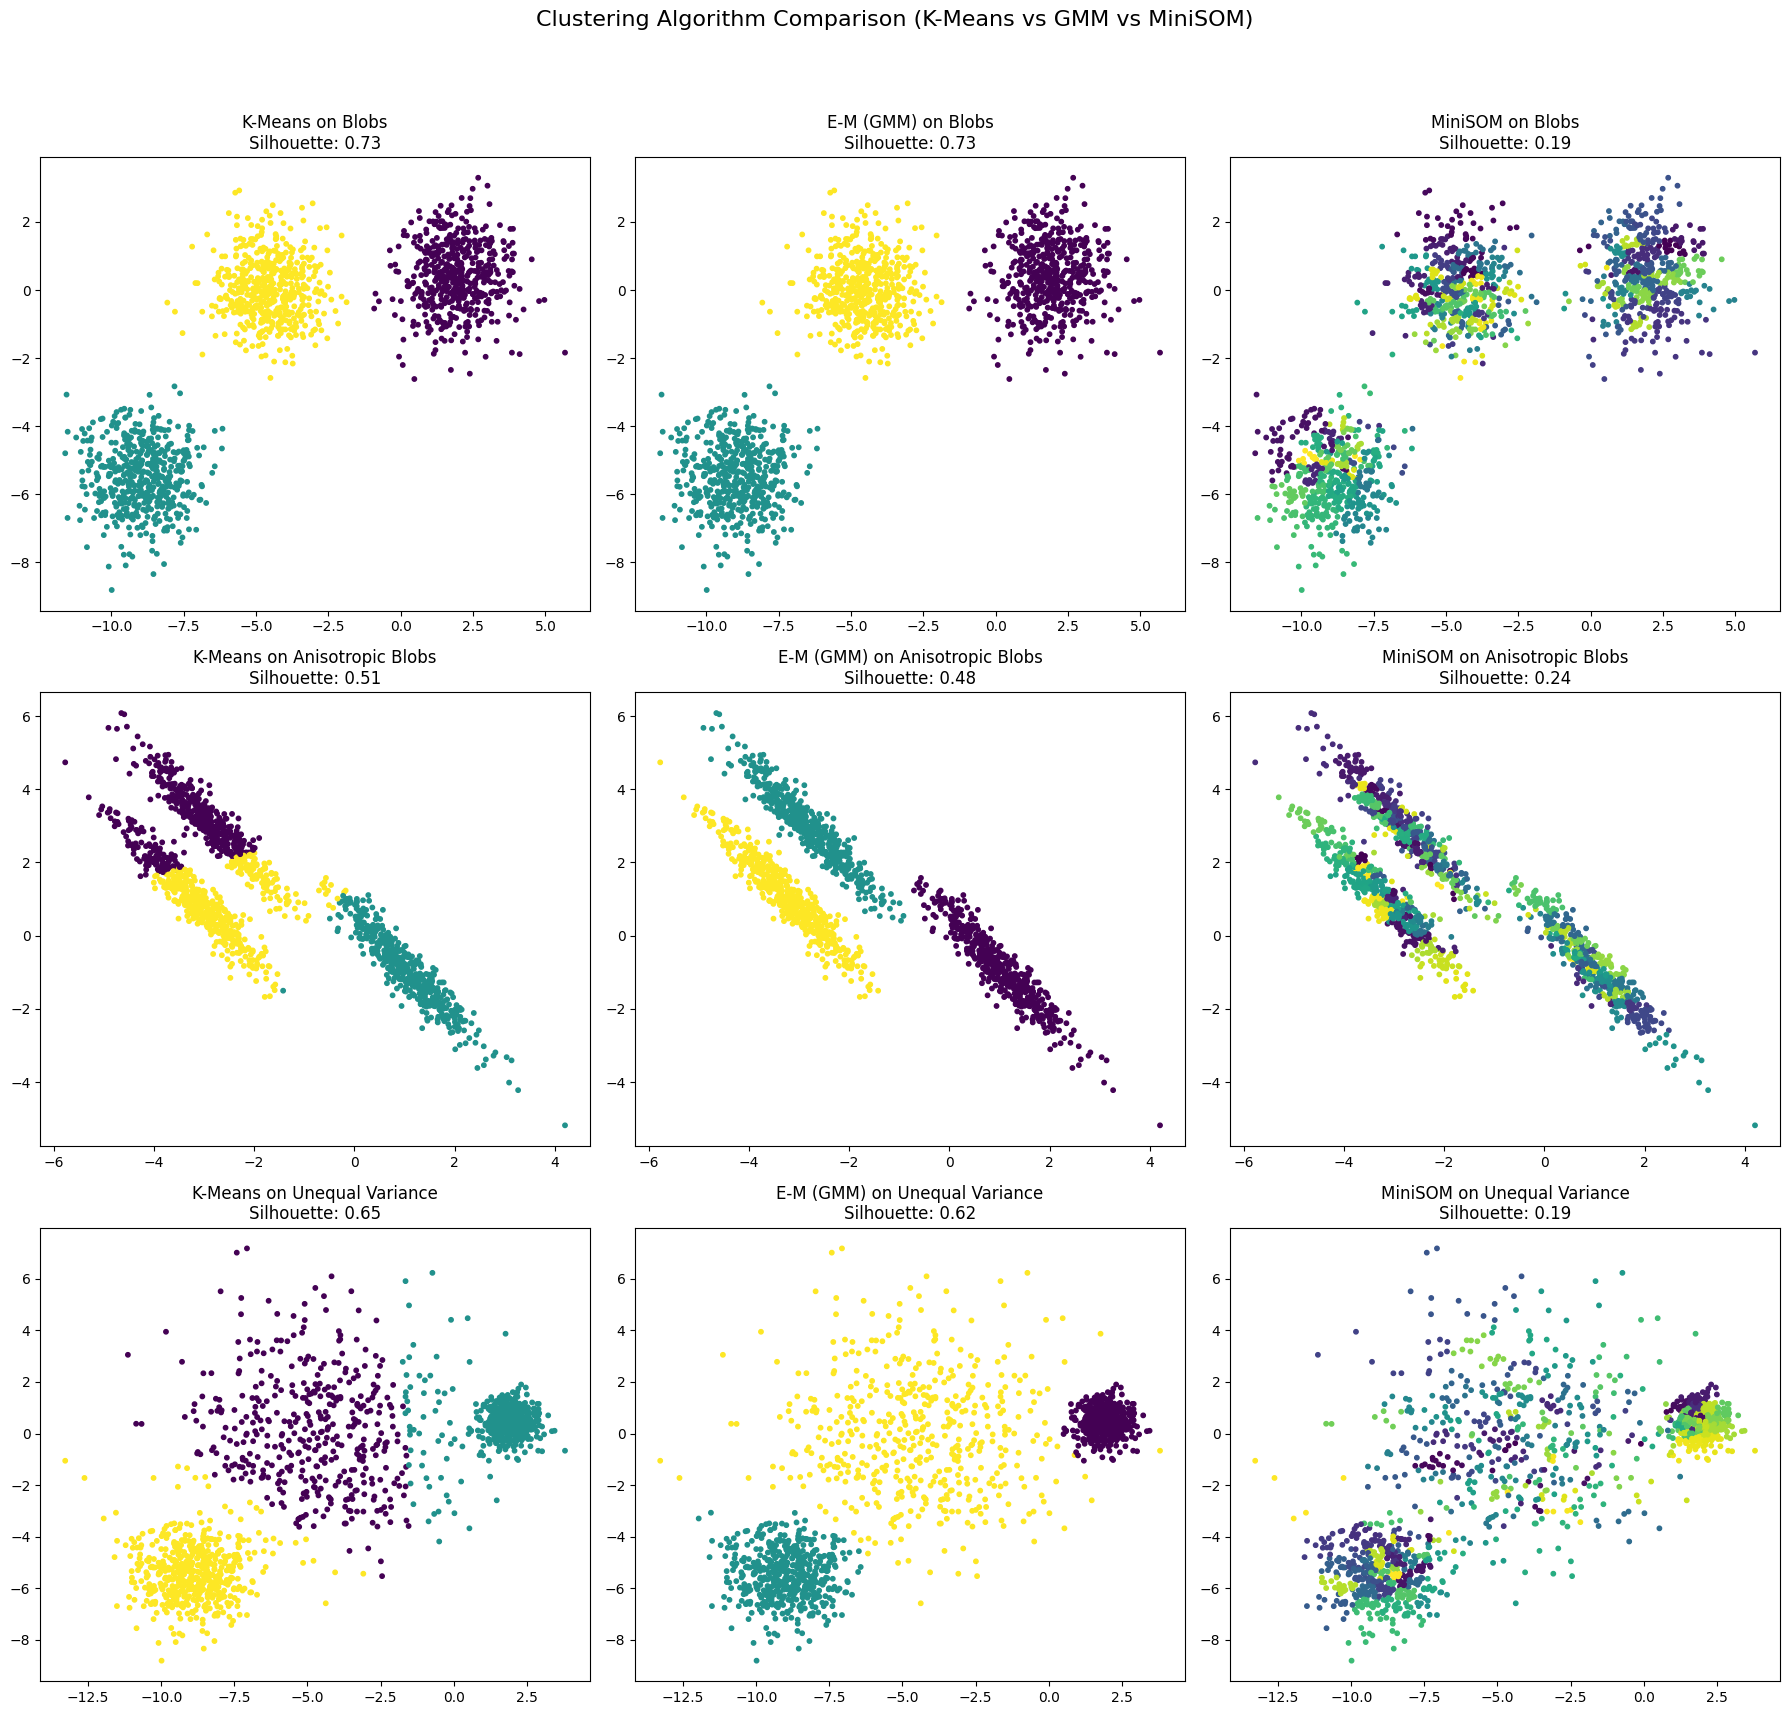

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from IPython.display import display

# Generate datasets
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# Datasets
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)

# Normalize datasets
scaler = StandardScaler()
datasets = [
    ("Blobs", X, scaler.fit_transform(X), y),
    ("Anisotropic Blobs", X_aniso, scaler.fit_transform(X_aniso), y),
    ("Unequal Variance", X_varied, scaler.fit_transform(X_varied), y_varied),
    ("Filtered Uneven Clusters", X_filtered, scaler.fit_transform(X_filtered), None)
]

# Helper function to plot results
def plot_clusters(X, y_pred, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=10)
    ax.set_title(title)

# Metrics storage
results = []

# Comparison of clustering algorithms
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
for i, (name, X, X_scaled, y_true) in enumerate(datasets[:3]):  # First three datasets
    # K-Means
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=random_state)
    y_pred_kmeans = kmeans.fit_predict(X)
    silhouette_kmeans = silhouette_score(X, y_pred_kmeans)
    plot_clusters(X, y_pred_kmeans, f"K-Means on {name}\nSilhouette: {silhouette_kmeans:.2f}", axs[i, 0])

    # Gaussian Mixture (E-M)
    gmm = GaussianMixture(n_components=3, random_state=random_state)
    y_pred_gmm = gmm.fit_predict(X)
    silhouette_gmm = silhouette_score(X, y_pred_gmm)
    plot_clusters(X, y_pred_gmm, f"E-M (GMM) on {name}\nSilhouette: {silhouette_gmm:.2f}", axs[i, 1])

    # MiniSOM
    som = MiniSom(20, 20, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X_scaled)
    som.train_random(X_scaled, 1000)
    som_labels = [som.winner(x) for x in X_scaled]
    som_cluster_ids = {loc: i for i, loc in enumerate(sorted(set(som_labels)))}
    y_pred_som = [som_cluster_ids[loc] for loc in som_labels]
    silhouette_som = silhouette_score(X, y_pred_som)
    plot_clusters(X, y_pred_som, f"MiniSOM on {name}\nSilhouette: {silhouette_som:.2f}", axs[i, 2])

    # Store results
    results.append((name, silhouette_kmeans, silhouette_gmm, silhouette_som))

# Display results as a table
results_df = pd.DataFrame(results, columns=["Dataset", "K-Means Silhouette", "GMM Silhouette", "MiniSOM Silhouette"])
print("Clustering Algorithm Comparison:")
display(results_df)

# Adjust layout
plt.suptitle("Clustering Algorithm Comparison (K-Means vs GMM vs MiniSOM)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# 3.Conclusion

The comparison between K-Means, E-M (Gaussian Mixture Model), and MiniSOM revealed distinct strengths and weaknesses for each clustering algorithm. K-Means demonstrated excellent performance on simple, spherical datasets like blobs due to its computational efficiency and straightforward implementation. However, it struggled with datasets featuring irregular shapes or varying variances, as it assumes strict Euclidean boundaries for clusters. E-M, with its probabilistic approach, outperformed K-Means in handling datasets with complex structures, such as anisotropic clusters or those with unequal variance. Despite being more computationally intensive, E-M’s flexibility makes it a robust choice for datasets where K-Means falls short. MiniSOM, on the other hand, excelled at preserving the topological structure of data, providing a unique perspective on clustering. While its clustering quality was not as high as E-M or K-Means in terms of silhouette scores, its ability to visualize high-dimensional relationships makes it valuable for exploratory analysis. Overall, the choice of algorithm depends on the dataset's structure and the specific requirements of the clustering task.






